# Decision Tree Classifier



In questa esercitazione si implementa un classificatore Decision Tree per una classificazione multiclasse e per testarne la capacità di prendere decisioni data driven.



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Dataset Drug

Il dataset contiene dati di pazienti che hanno sofferto della stessa malattia, ciascuno dei quali è stato sottoposto a uno tra cinque trattamenti: Drug A, Drug B, Drug C, Drug X and Drug Y.

Lo scopo dell'esercitazione è costruire un modello che decida quale trattamento è appropriato a un possibile paziente futuro con la stessa malattia, basandosi sulle variabili Age, Sex, Blood Pressure, Cholesterol e Na_to_K.




In [2]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv(path)
my_data.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
44,50,F,NORMAL,NORMAL,12.295,drugX
104,22,M,HIGH,NORMAL,28.294,drugY
112,35,M,LOW,NORMAL,9.170,drugX
169,20,F,HIGH,HIGH,11.262,drugA
190,58,M,HIGH,HIGH,18.991,drugY


## Preprocessing



In [3]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Quattro delle features sono di tipo `object`, quindi devono essere convertite in features numeriche affinché possano essere usate dal modello; questo si può fare con __LabelEncoder__ di scikit-learn.


In [5]:
label_encoder = LabelEncoder()
my_data['Sex'] = label_encoder.fit_transform(my_data['Sex'])
my_data['BP'] = label_encoder.fit_transform(my_data['BP'])
my_data['Cholesterol'] = label_encoder.fit_transform(my_data['Cholesterol'])
my_data.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
68,54,1,2,0,24.658,drugY
41,58,0,0,1,14.239,drugB
58,60,1,2,1,10.091,drugX
49,28,0,1,0,19.796,drugY
119,61,0,0,0,25.475,drugY


In [7]:
# Check della conversione in int64 delle features categoriche
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


Il __LabelEncoder__ esegue questa trasformazione:
<br>
- 'Sex' : $M \rightarrow 1, F \rightarrow 0$ <br>
- 'BP' : $High \rightarrow 0, Low \rightarrow 1, Normal \rightarrow 2$<br>
- 'Cholesterol' : $High \rightarrow 0, Normal \rightarrow 1$


In [ ]:
# Check dei valori mancanti
my_data.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


La stessa trasformazione si deve applicare al target, e di seguito viene eseguito un mapping manuale sulla scia di quello eseguito da __LabelEncoder__.


In [8]:
custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
my_data['Drug_num'] = my_data['Drug'].map(custom_map)
my_data.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
172,39,0,2,1,17.225,drugY,4
32,49,1,1,1,11.014,drugX,3
117,40,0,2,0,10.103,drugX,3
51,67,1,2,1,10.898,drugX,3
24,33,0,1,0,33.486,drugY,4


### Correlazioni tra le variabili


In [9]:
# Rimuovo la colonna 'Drug' lasciando 'Drug_num'
df = my_data.drop('Drug', axis=1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_num
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [11]:
# Correlazioni variabili - target
df.corr()['Drug_num']

,Drug_num
Age,-0.004828
Sex,-0.098573
BP,0.372868
Cholesterol,0.055629
Na_to_K,0.589120
Drug_num,1.000000


### Distribuzione della variabile target

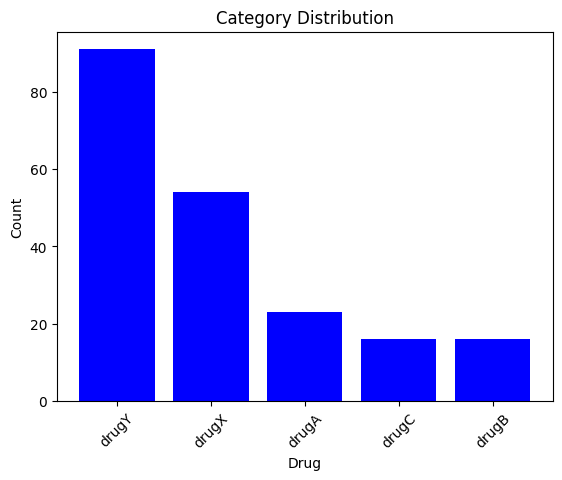

In [13]:
category_counts = my_data['Drug'].value_counts()  # conteggio delle classi

plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.show()

## Definizione del modello


In [19]:
# Suddivisione del dataset
y = my_data['Drug']
X = my_data.drop(['Drug','Drug_num'], axis=1)  # solo le features
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=32)

print(X_trainset.shape, X_testset.shape)

(140, 5) (60, 5)


In [20]:
# Definizione del modello Decision Tree Classifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_trainset,y_trainset)  # addestramento

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Valutazione


In [18]:
tree_predictions = drugTree.predict(X_testset)  # predizioni sul test set
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))  # accuracy

Decision Trees's Accuracy:  0.9833333333333333



Con una accuracy del 98.3% circa il modello ha classificato correttamente almeno 59 esempi dei 60 contenuti nel test set.


### Visualizzazione dell'albero di decisione

Utile per capire la struttura dell'albero e secondo quali criteri avviene la classificazione degli esempi.


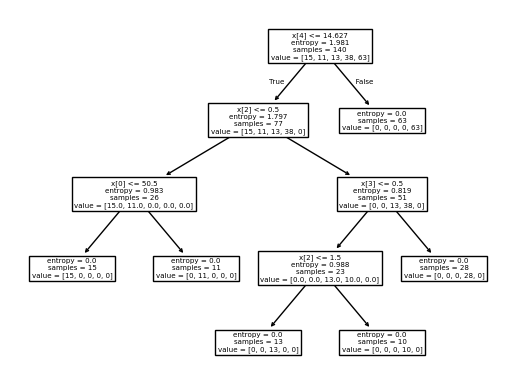

In [21]:
plot_tree(drugTree)
plt.show()

Criteri di decisione:
- Drug A : $Na\_to\_K <= 14.627, BP = High, Age <= 50.5$<br>
- Drug B : $Na\_to\_K <= 14.627, BP = High, Age > 50.5$ <br>
- Drug C : $Na\_to\_K <= 14.627, BP = Normal, Cholesterol = High$<br>
- Drug X : $Na\_to\_K <= 14.627, (BP = Low, Cholesterol = High) \,\, or \,\,(BP = Normal/Low, Cholesterol = Normal)$
- Drug Y is ${Na\_to\_K} \gt 14.627$.



Cosa succede all'accuracy del modello variando il parametro `max_dept`?

In [22]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
drugTree.fit(X_trainset, y_trainset)
drug_pred = drugTree.predict(X_testset)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, drug_pred))

Decision Trees's Accuracy:  0.8166666666666667


In [23]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 30)
drugTree.fit(X_trainset, y_trainset)
drug_pred = drugTree.predict(X_testset)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, drug_pred))

Decision Trees's Accuracy:  0.9833333333333333


max_depth = 1 	 train accuracy: 0.72 	 test accuracy: 0.72
max_depth = 2 	 train accuracy: 0.83 	 test accuracy: 0.85
max_depth = 3 	 train accuracy: 0.93 	 test accuracy: 0.82
max_depth = 4 	 train accuracy: 1.00 	 test accuracy: 0.98
max_depth = 5 	 train accuracy: 1.00 	 test accuracy: 0.98
max_depth = 6 	 train accuracy: 1.00 	 test accuracy: 0.98
max_depth = 7 	 train accuracy: 1.00 	 test accuracy: 0.98
max_depth = 8 	 train accuracy: 1.00 	 test accuracy: 0.98
max_depth = 9 	 train accuracy: 1.00 	 test accuracy: 0.98
max_depth = 10 	 train accuracy: 1.00 	 test accuracy: 0.98
max_depth = 11 	 train accuracy: 1.00 	 test accuracy: 0.98
max_depth = 12 	 train accuracy: 1.00 	 test accuracy: 0.98


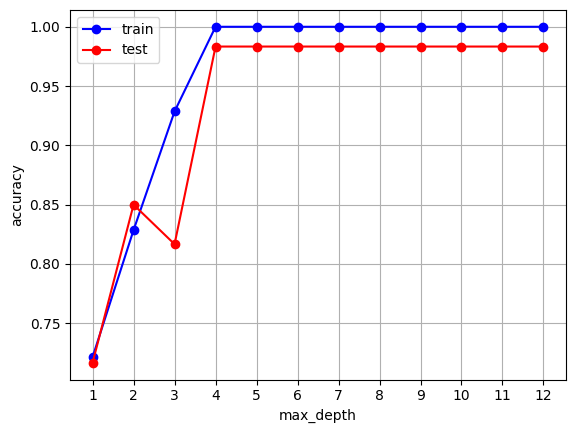

In [24]:
# Faccio un loop per vedere come variano le performance in base a max_depth e visualizzare eventuale overfitting
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
criterion = 'entropy'
hist_train_acc = []
hist_test_acc = []

for i, max_depth in enumerate(max_depths):
  model = DecisionTreeClassifier(criterion= criterion, max_depth = max_depth)
  model.fit(X_trainset, y_trainset)
  model_pred_train = model.predict(X_trainset)
  model_pred_test = model.predict(X_testset)
  print(f"max_depth = {max_depth} \t train accuracy: {metrics.accuracy_score(y_trainset, model_pred_train):.2f} \t test accuracy: {metrics.accuracy_score(y_testset, model_pred_test):.2f}")
  hist_train_acc.append(metrics.accuracy_score(y_trainset, model_pred_train))
  hist_test_acc.append(metrics.accuracy_score(y_testset, model_pred_test))

plt.plot(max_depths, hist_train_acc, c='b', marker='o', label='train')
plt.plot(max_depths, hist_test_acc, c='r', marker='o', label='test')
plt.legend()
plt.xticks(max_depths)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.grid()

Quello che si vede è che per max_depth=2 c'è la migliore generalizzazione da parte del modello (miglior bias-variance tradeoff), mentre per max_depth=3 si avverte il primo segnale di overfitting che viene chiaramente confermato per max_depth maggiori. L'accuracy sul train aumenta e l'accuracy sul test ne risente, perché il modello sta apprendendo i dati.